Problem Definition:
- Clearly define the problem you aim to solve using supervised learning (classification or regression).
- Describe the dataset you will work with, including the features and the target variable.

What is the projected sale price of a 2000 sqft gross home? (regression)

Feature Scaling:
- Perform necessary feature scaling and justify your choice.

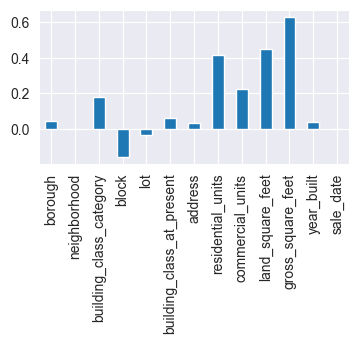

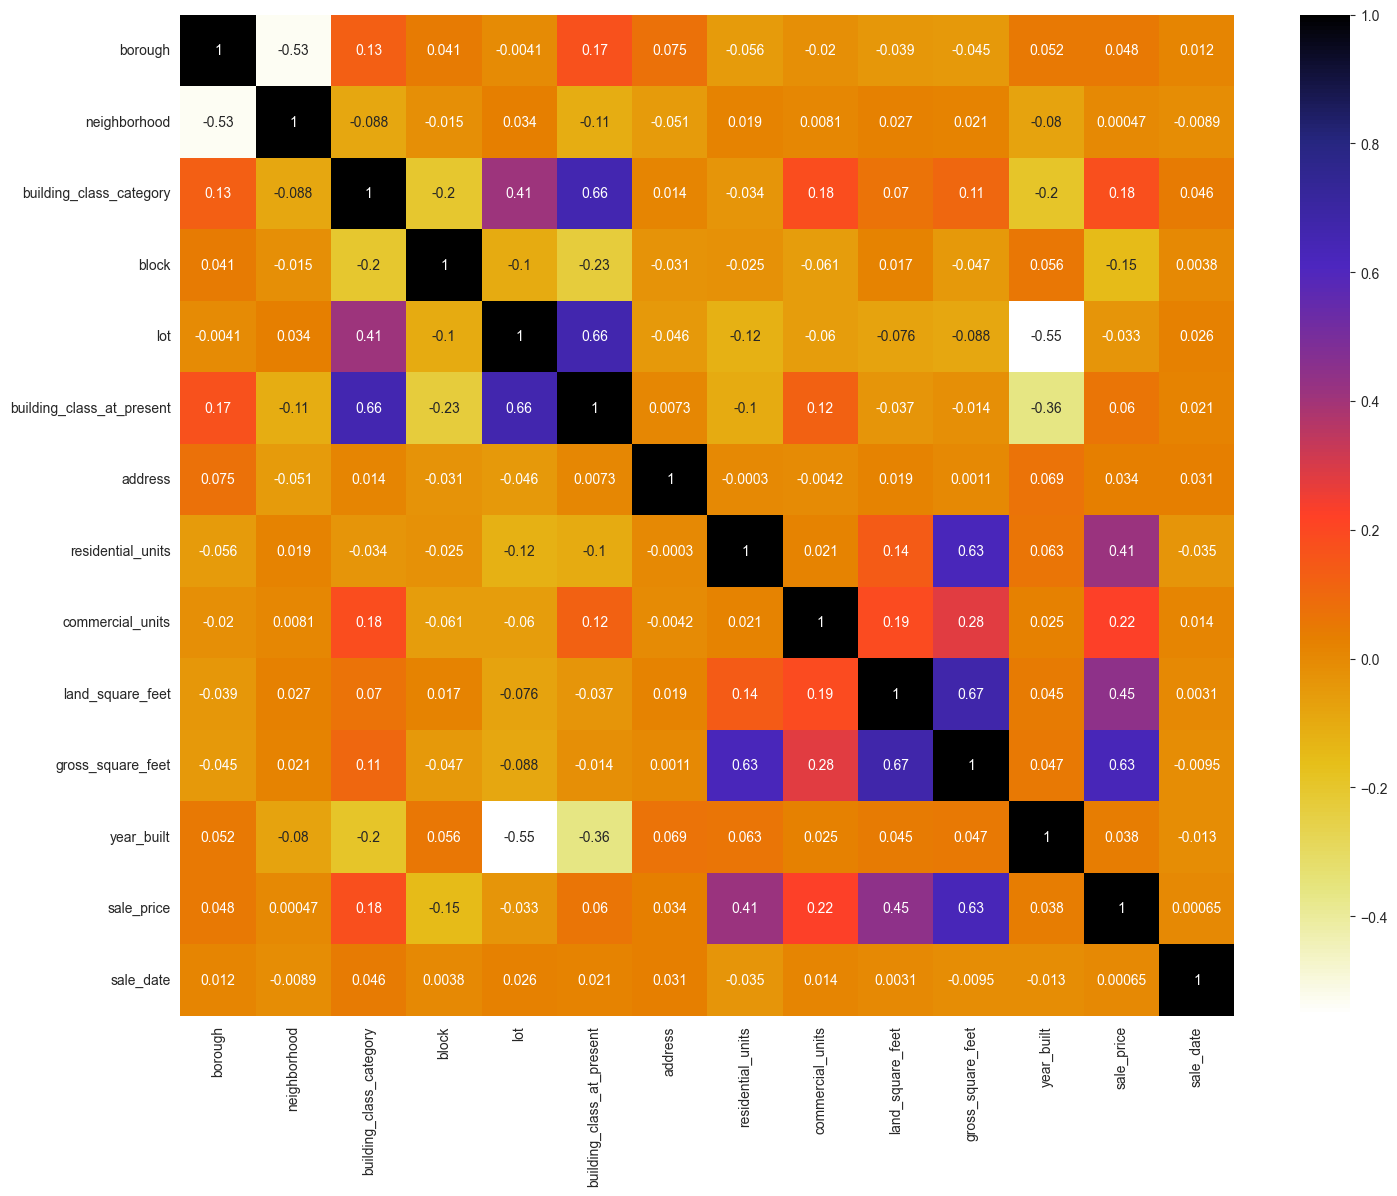

,borough,neighborhood,building_class_category,block,lot,building_class_at_present,address,residential_units,commercial_units,land_square_feet,gross_square_feet,year_built,sale_price,sale_date
0,0,1,0,3030,62,1,7204,1,0,1578,1470,1899,455000,18
1,0,1,0,3030,70,1,7182,1,0,1694,1497,1899,388500,207
2,0,1,0,3039,63,1,7381,1,0,1650,1296,1910,419000,36
3,0,1,0,3043,55,1,3502,1,0,2356,2047,1901,470000,97
4,0,1,0,3046,35,1,3890,1,0,2050,1560,1899,445000,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10891,1,48,3,6887,1018,78,5108,0,0,0,737,0,375000,153
10892,1,48,3,6887,1021,78,5107,0,0,0,924,0,545000,154
10893,1,48,3,6889,1005,78,4416,0,0,0,1077,0,610000,83
10894,1,48,3,6889,1016,78,4485,0,0,0,1604,2008,650000,248


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


df = pd.read_csv('small.csv')
og_df = pd.read_csv('small.csv')
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

correlation_matrix = df.corr()



columns_to_drop = correlation(df, 0.7)

# columns_to_drop.remove('sale_price')

df.drop(columns=columns_to_drop, inplace=True)

# Plot correlation of remaining features with 'sale_price'
df.corr()['sale_price'].drop('sale_price').plot(figsize=(4, 2), kind='bar')
plt.show()
cm = df.corr()
# Display the modified DataFrame
plt.figure(figsize = (17,13))
sns.heatmap(cm, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()
df

In [6]:
X = df.iloc[:, 7:11].values # gross_square_feet, residential_units, commercial_units, land_square_feet
y = df.iloc[:, -2].values # sale_price

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# feature scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Data Modeling:

Model Selection:
- Choose at least three supervised learning models suitable for your problem.
- Provide a brief justification for selecting each model relative to your dataset. You'll receive zero points if you read the generic description from ChatGPT. 

In [4]:
print("Maximum Memory Usage (MB): 12.349672786")
print("Maximum CPU Usage (MB): 73.16%" )

Maximum Memory Usage (MB): 12.349672786
Maximum CPU Usage (MB): 73.16%


Implementation:
- Implement each chosen model using a programming language of your choice (e.g., Python with libraries like Scikit-learn).
- Train each model on the training set.

In [6]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion='entropy', random_state=0) 
classifier_dtc.fit(X_train, y_train)

# random forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion='entropy', random_state=0, verbose=1) 
classifier_rf.fit(X_train, y_train)

#GBR gradient boosting regression
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   19.9s


MemoryError: could not allocate 299106304 bytes

Hyperparameter Tuning:
- Perform hyperparameter tuning for each model to optimize its performance.
- Use both grid and randomized search techniques to find the best hyperparameters.
- Show the tradeoff between grid search and randomized search regarding resource consumption (e.g., time, memory, and CPU) and performance gain (e.g., model accuracy). 
- Justify your choice of hyperparameters based on experimentation and reasoning. You'll receive zero points if you read the generic description from ChatGPT. 

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Decision Tree Regressor
param_grid_dtr = {
    'criterion': ['mse', 'friedman_mse', 'mae'], 
    'max_depth': [None] + list(np.random.randint(1, 21, size=10)), 
    'min_samples_split': list(np.random.randint(2, 11, size=10)), 
    'min_samples_leaf': list(np.random.randint(1, 5, size=10))  
}
regressor_dtr = DecisionTreeRegressor(random_state=0)
grid_search_dtr = GridSearchCV(estimator=regressor_dtr, param_grid=param_grid_dtr, cv=5, scoring='neg_mean_squared_error')
grid_search_dtr.fit(X_train, y_train)
best_params_dtr = grid_search_dtr.best_params_

print("Best Parameters for Decision Tree Regressor:", best_params_dtr)
best_regressor_dtr = grid_search_dtr.best_estimator_

y_pred_dtr = best_regressor_dtr.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print("Mean Squared Error for Decision Tree Regressor:", mse_dtr)

from sklearn.metrics import r2_score
r2_dtr = r2_score(y_test, y_pred_dtr)
print("R-squared for Decision tree:", r2_dtr)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

param_dist_dtr = {
    'criterion': ['mse', 'friedman_mse', 'mae'], 
    'max_depth': [None] + list(np.random.randint(1, 21, size=10)), 
    'min_samples_split': list(np.random.randint(2, 11, size=10)), 
    'min_samples_leaf': list(np.random.randint(1, 5, size=10))  
}
regressor_dtr = DecisionTreeRegressor(random_state=0)
random_search_dtr = RandomizedSearchCV(estimator=regressor_dtr, param_distributions=param_dist_dtr, 
                                       n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=0)
random_search_dtr.fit(X_train, y_train)
best_params_dtr = random_search_dtr.best_params_

print("Best Parameters for Decision Tree Regressor (Randomized Search):", best_params_dtr)
best_regressor_dtr = random_search_dtr.best_estimator_

y_pred_dtr = best_regressor_dtr.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print("Mean Squared Error for Decision Tree Regressor (Randomized Search):", mse_dtr)

from sklearn.metrics import r2_score
r2_dtr = r2_score(y_test, y_pred_dtr)
print("R-squared for Decision Tree (Randomized Search):", r2_dtr)


Best Parameters for Decision Tree Regressor: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error for Decision Tree Regressor: 48299983214.24
R-squared for Decision tree: 0.976342406007426


C:\Users\Markus\Documents\vswkpc\term4\ACIT-4880-Introduction-to-Data-Analytics\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
270 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Markus\Documents\vswkpc\term4\ACIT-4880-Introduction-to-Data-Analytics\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Markus\Documents\vswkpc\term4\ACIT-4880-Introduction-to-Data-Analytics\.venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
param_grid_rf = {
    'n_estimators': [10, 50, 90, 91],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

regressor_rf = RandomForestRegressor(random_state=0)
grid_search_rf = GridSearchCV(estimator=regressor_rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_

print("Best Parameters for Random Forest Regressor:", best_params_rf)
best_regressor_rf = grid_search_rf.best_estimator_

y_pred_rf = best_regressor_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error for Random Forest Regressor:", mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)
print("R-squared for Random Forest Regressor:", r2_rf)


Best Parameters for Random Forest Regressor: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error for Random Forest Regressor: 18804138189.62274
R-squared for Random Forest Regressor: 0.9907896310295363


In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_regressor_gbr = grid_search.best_estimator_

# Evaluate the best estimator using mean squared error (MSE)
y_pred = best_regressor_gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_rf = r2_score(y_test, y_pred_rf)
print("R-squared for GRB:", r2_rf)
X_test

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 13604934921.91713
R-squared for GRB: 0.9907896310295363


array([[-5.30627588e-02, -1.96570283e-01,  3.46537697e-01,
         1.54572684e-02],
       [-2.00715653e-01, -1.96570283e-01,  3.88576844e-01,
        -6.07700799e-02],
       [-5.30627588e-02, -1.96570283e-01,  2.20420256e-01,
        -1.34065607e-01],
       [-1.26889206e-01, -1.96570283e-01,  1.30336370e-01,
        -1.57226994e-01],
       [ 2.07636882e-02, -1.96570283e-01,  2.50448218e-01,
        -7.68950958e-02],
       [-5.30627588e-02, -1.96570283e-01,  2.05406275e-01,
        -7.74814601e-02],
       [ 2.07636882e-02, -1.96570283e-01,  3.40532104e-01,
        -6.67304721e-02],
       [-5.30627588e-02, -1.96570283e-01,  2.20420256e-01,
        -9.00882907e-02],
       [-5.30627588e-02, -1.96570283e-01,  4.32552794e-02,
        -1.64849728e-01],
       [-1.26889206e-01, -1.96570283e-01,  2.14414664e-01,
        -1.60451997e-01],
       [ 9.45901352e-02, -1.96570283e-01,  1.33339166e-01,
        -5.49064377e-02],
       [-1.26889206e-01, -1.96570283e-01,  1.90392294e-01,
      

In [1]:
input_data = [[2000, 2, 0, 0]]

# Predict using Random Forest Regressor
predicted_price_rf = best_regressor_rf.predict(input_data)
print("Predicted price using Random Forest Regressor:", f"{predicted_price_rf[0]:,.2f}")

# Predict using Decision Tree Regressor
predicted_price_dtc = best_regressor_dtr.predict(input_data)
print("Predicted price using Decision Tree Regressor:", f"{predicted_price_dtc[0]:,.2f}")

# Predict using Gradient Boosting Regressor
predicted_price_gb = best_regressor_gbr.predict(input_data)
print("Predicted price using Gradient Boosting Regressor:", f"{predicted_price_gb[0]:,.2f}")

# Calculate the absolute differences
og_df['sqft_difference'] = abs(og_df['gross_square_feet'] - 2000)

# Find the row with the minimum absolute difference
closest_row = og_df.loc[og_df['sqft_difference'].idxmin()]
print(closest_row)
# Remove the 'sqft_difference' column if you don't need it anymore
og_df.drop(columns=['sqft_difference'], inplace=True)

# Now closest_row contains the row with the closest gross sqft to 2000


NameError: name 'best_regressor_rf' is not defined

Evaluation:
- Evaluate the performance of each model on the testing set using appropriate metrics (e.g., R-squared, Adjusted R-squared, accuracy, precision, recall, F1 score, confusion matrix, sensitivity, specificity, ROC, AUC, etc.).
- Provide a comparative analysis of the models and discuss their strengths and weaknesses relative to your dataset. You'll receive zero points if you read the generic description from ChatGPT. 

Conclusion:
Summarize what you learned from this project and the course. 

In [8]:
# Access the feature importances
feature_importances = best_regressor_rf.feature_importances_

# Create an array of indices corresponding to the order of feature importances
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the feature importances in descending order
for index in sorted_indices:
    print(f"Feature: {index}, Importance: {feature_importances[index]}")


Feature: 3, Importance: 0.7578382230171254
Feature: 0, Importance: 0.24182243266355175
Feature: 2, Importance: 0.0002782754603417255
Feature: 1, Importance: 6.106885898112777e-05
